In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import math
import operator
import collections
import ast
import matplotlib.cm as cm

In [2]:
def change_order_1(input_permutation):
    permutations = []
    for i in range(0,len(input_permutation)-1):
        copy = input_permutation.copy()
        copy[i], copy[i+1] = copy[i+1], copy[i]
        permutations.append(copy)
    return permutations

def changes(orders_dict,level):
    admissible_level = [key for (key,value) in orders_dict.items() if value==level-1]
    for i in range(len(admissible_level)):
        inputs = ast.literal_eval(admissible_level[i])
        perms = change_order_1(inputs)
        for j in range(len(perms)):
            perm = perms[j]
            if str(perm) not in orders_dict.keys():
                orders_dict[str(perm)] = level
            else:
                pass
    return orders_dict

def find_tree(input_string,max_levels):
    codes_dictionary = {}
    codes_dictionary[str(input_string)] = 0
    for i in range(max_levels+1):
        new_dictionary = changes(codes_dictionary,i)
        codes_dictionary = new_dictionary
    return codes_dictionary

def find_max_level(input_string):
    N = len(input_string)
    maximum = math.factorial(N)
    
    for i in range(maximum):
        max_val = i
        test = find_tree(input_string,max_val)
        if len(test) == maximum:
            return max_val
        
def permutation_tree(input_pattern):
    test = input_pattern
    value = find_max_level(test)
    tree = find_tree(test,value)
    
    return tree

def difference_score(original,permutation):
    all_permutations = permutation_tree(original)
    permutation_score = all_permutations[str(permutation)] 
    
    N = max(list(all_permutations.values())) + 1 # Scales the `entropy' score to be bounded on [0,1]
    
    score = math.log(permutation_score+1,2)/math.log(N,2)
    
    return score

In [3]:
test = [2,1,3,4]
permutations = list(permutation_tree(test).keys())

permutation_scores = {}
for i in range(len(permutations)):
    score = difference_score(test,permutations[i])
    permutation_scores[permutations[i]] = score

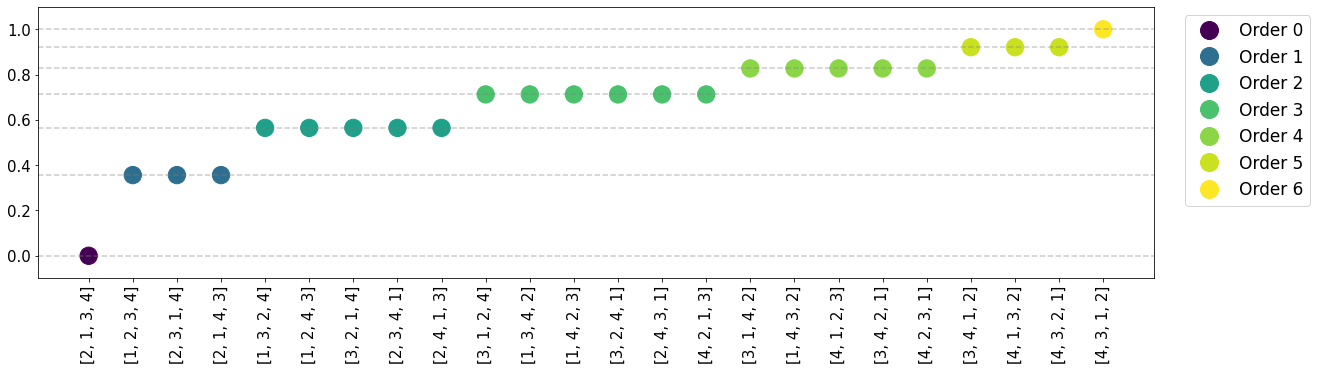

In [4]:
x = list(permutation_scores.keys())
y = list(permutation_scores.values())
y_set = list(set(y))

#labels = [f'Order {i}' for i in range(7)]
labels = [f'Order {i}' for i in range(len(x))]

fontsize=15

plt.figure(figsize=(20,5))
scatter = plt.scatter(x,y,c=y,s=300,cmap='viridis')
plt.xticks(rotation='vertical',fontsize=fontsize)
plt.yticks(fontsize=fontsize)
[plt.axhline(y_set[i],linestyle='--',c='grey',alpha=0.4) for i in range(len(y_set))]
plt.legend(handles=scatter.legend_elements()[0],
           labels=labels,
           fontsize=fontsize+2,bbox_to_anchor=(1.02,1),markerscale=3)
plt.ylim((-0.1,1.1));